In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
import matplotlib.pyplot as plt

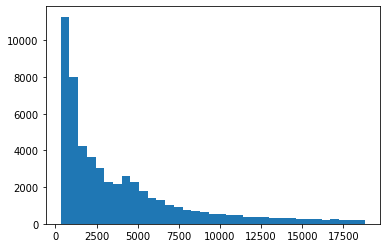

In [7]:
plt.hist(df.price, bins = 35);

In [8]:
import numpy as np

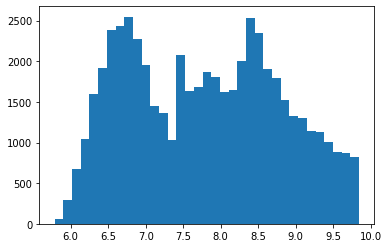

In [9]:
plt.hist(np.log(df.price), bins = 35);

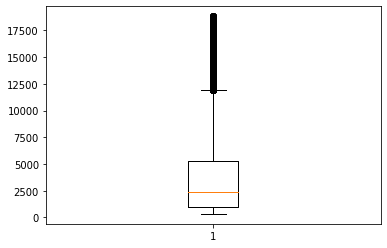

In [11]:
plt.boxplot(df.price);

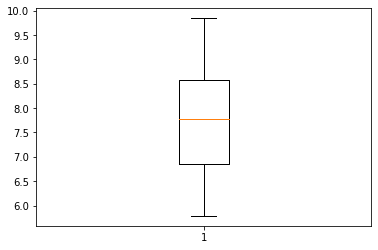

In [12]:
plt.boxplot(np.log(df.price));

In [25]:

def outlier(y):
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    print(lower_whisker,upper_whisker)
    outlier = (y>upper_whisker) |  (y<lower_whisker)
    return outlier


In [26]:
df[outlier(df.price)]

326 11885.625


,carat,cut,color,clarity,depth,table,price,x,y,z
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68
...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [27]:
df[outlier(df.price)].shape

326 11885.625


(3540, 10)

In [28]:
df.shape

(53940, 10)

In [29]:
3540/53940

0.06562847608453838

In [31]:
a = np.array([9, 6, 10, 11, 13, 4, 8])
np.mean(a), np.std(a), np.median(a)

(8.714285714285714, 2.813959371941744, 9.0)

In [32]:
a = np.array([9, 6, 10, 11, 13, 4, 8, 100])
np.mean(a), np.std(a), np.median(a)

(20.125, 30.304444806001644, 9.5)

Text(0.5, 1.0, 'Frequency plot by cut')

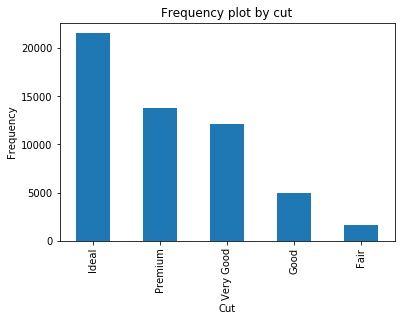

In [37]:
df.cut.value_counts().plot.bar()
plt.xlabel("Cut")
plt.ylabel("Frequency")
plt.title("Frequency plot by cut")

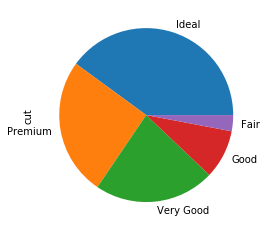

In [38]:
df.cut.value_counts().plot.pie()

Text(0.5, 1.0, 'Scatter plot - price by carat')

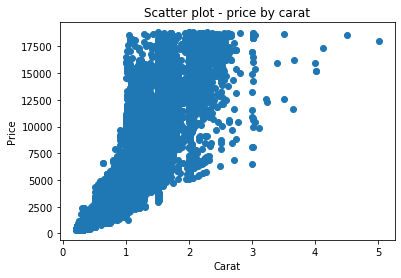

In [41]:
plt.scatter(df.carat, df.price)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Scatter plot - price by carat")

In [42]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [43]:
colors = {'Ideal':"red", 'Premium': "blue", 'Good': "green", 'Very Good':"steelblue", 'Fair':"orange"}

In [44]:
color = df.cut.apply(lambda v: colors[v])

Text(0.5, 1.0, 'Scatter plot - price by carat')

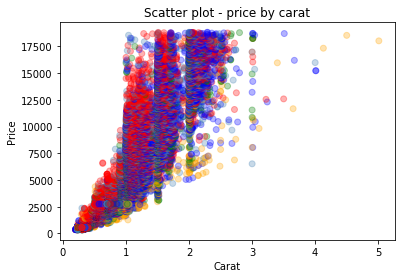

In [46]:
plt.scatter(df.carat, df.price, color = color, alpha = 0.3)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Scatter plot - price by carat")

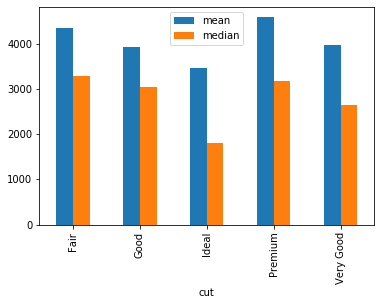

In [50]:
df.groupby("cut").price.agg(["mean", "median"]).plot.bar()

In [48]:
import seaborn as sns

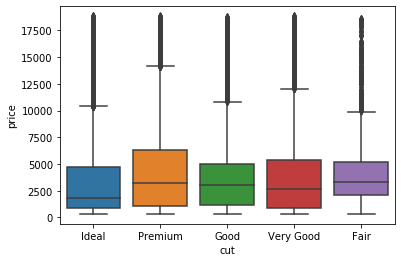

In [49]:
sns.boxplot("cut", "price", data= df)

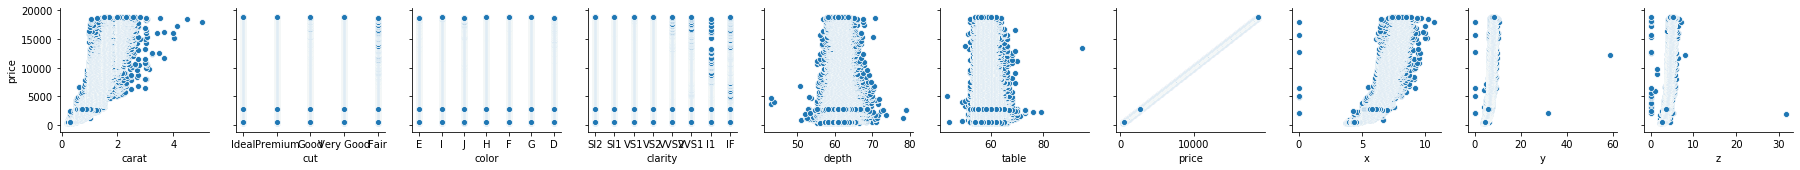

In [52]:
sns.pairplot(df, x_vars=df.columns, y_vars=["price"])

In [55]:
agg = df.pivot_table("price", "cut", "color", aggfunc="mean")

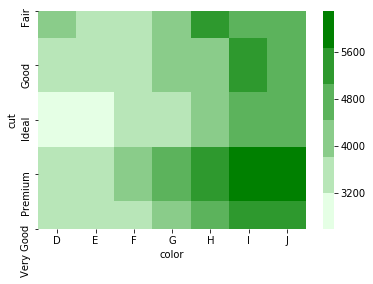

In [61]:
sns.heatmap(agg, cmap=sns.light_palette("green"))